# <center> <span style='color:Blue'>---Ultra-Wideband indoor localization---</span> <center>

# 1 -Get data from the csv file

In [44]:
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
import csv
import math 
import time 
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 12})

In [45]:
data = {'x_uwb':[],'y_uwb':[], 'x_amcl' : [], 'y_amcl' : [], 'x_odom' : [], 'y_odom' : [], 'x_mocap' : [], 'y_mocap' : [],\
       'x_mocap_q' : [],'y_mocap_q' : [],'z_mocap_q' : [],'w_mocap_q' : [],'x_mocap_n' :[],'y_mocap_n':[],'orientation':[],\
       'Euler_angle':[],'x_uwb_n':[],'y_uwb_n':[]}
mbr = []
trajec = []

In [46]:
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
        return roll_x, pitch_y, yaw_z # in radians

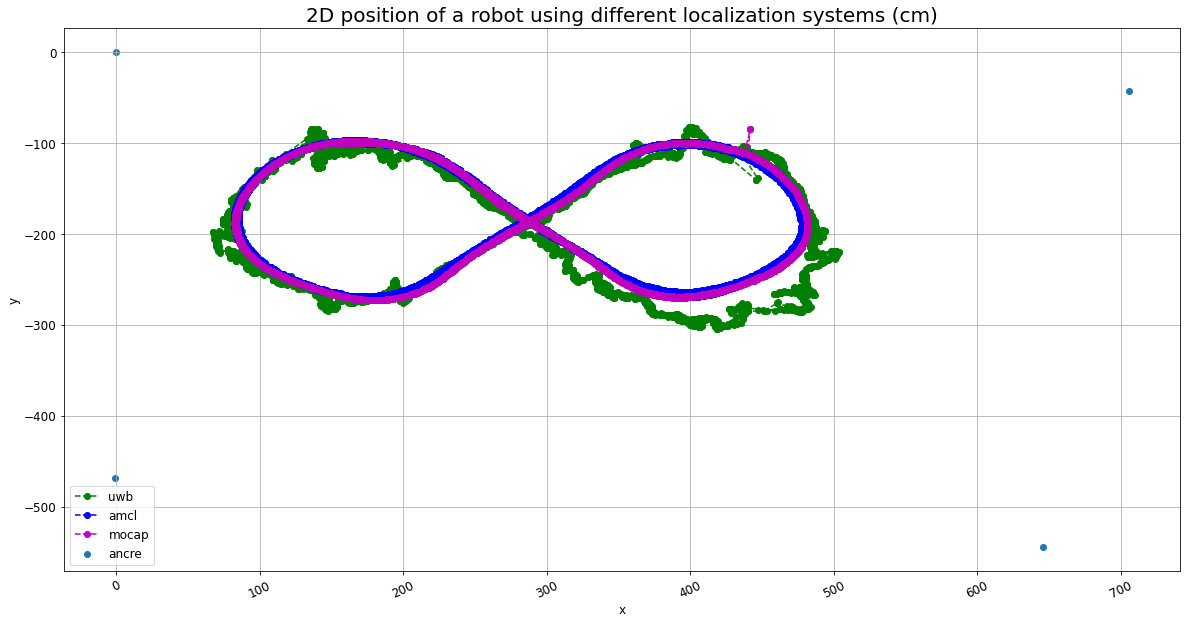

In [48]:
i = 0
passed = 0
with open('All_data.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        if ((-800< int(row[0]) < 600) and (-400< int(row[1]) < 300)):
        #if ((-800< int(row[0]) < 600) and (-400< int(row[1]) < 300)) and float(row[-1])!=16 and float(row[-1])!=29:
            data['x_uwb'].append(int(row[0])-25)
            data['y_uwb'].append(int(row[1])+70)
            data['x_amcl'].append(float(row[4])+167)
            data['y_amcl'].append(float(row[5])-100)
            data['x_odom'].append(float(row[2])+158)
            data['y_odom'].append(float(row[3])-95)
            data['x_mocap'].append(float(row[6]))
            data['y_mocap'].append(float(row[7]))
            data['x_mocap_q'].append(float(row[9]))
            data['y_mocap_q'].append(float(row[10]))
            data['z_mocap_q'].append(float(row[11]))
            data['w_mocap_q'].append(float(row[12]))
            data['Euler_angle'].append(euler_from_quaternion(data['x_mocap_q'][-1],data['y_mocap_q'][-1],data['z_mocap_q'][-1],data['w_mocap_q'][-1])[2])
            data['orientation'].append(math.degrees(data['Euler_angle'][-1]))
            data['x_mocap_n'].append(data['x_mocap'][-1]-13.4*math.cos(data['Euler_angle'][-1])-9.25*math.sin(data['Euler_angle'][-1]))
            data['y_mocap_n'].append(data['y_mocap'][-1]-13.4*math.sin(data['Euler_angle'][-1])+9.25*math.cos(data['Euler_angle'][-1]))
            data['x_uwb_n'].append(data['x_uwb'][-1]+21.2*math.cos(data['Euler_angle'][-1]))
            data['y_uwb_n'].append(data['y_uwb'][-1]+21.2*math.sin(data['Euler_angle'][-1]))
            mbr.append(i)
            i= i+1
            trajec.append(int(row[-1]))
            passed = 0
            
x_coordinates = [0, 690.012+16.05, 629.654+16.05,-17.068+16.05]
y_coordinates = [0, -67.89+25.84, -569.792+25.684,-474.266+5.684]

'''plt.plot(x_uwb, y_uwb, color = 'g', linestyle = 'dashed',
         marker = 'o',label = "uwb")'''
plt.plot(data['x_uwb_n'], data['y_uwb_n'], color = 'g', linestyle = 'dashed',
         marker = 'o',label = "uwb")

plt.plot(data['x_amcl'], data['y_amcl'], color = 'b', linestyle = 'dashed',
         marker = 'o',label = "amcl")

'''plt.plot(x_odom, y_odom, color = 'r', linestyle = 'dashed',
         marker = 'o',label = "odom")'''

'''plt.plot(x_mocap, y_mocap, color = 'm', linestyle = 'dashed',
         marker = 'o',label = "x_mocap")'''

plt.plot(data['x_mocap_n'], data['y_mocap_n'], color = 'm', linestyle = 'dashed',
         marker = 'o',label = "mocap")
'''plt.plot(mbr, data['orientation'], color = 'g', linestyle = 'dashed',
         marker = 'o',label = "orientation_new")'''
plt.scatter(x_coordinates, y_coordinates, label = "ancre")

plt.xticks(rotation = 25)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D position of a robot using different localization systems (cm)', fontsize = 20)
plt.grid()
plt.legend()
plt.show()


# 2 -plot the trajectories

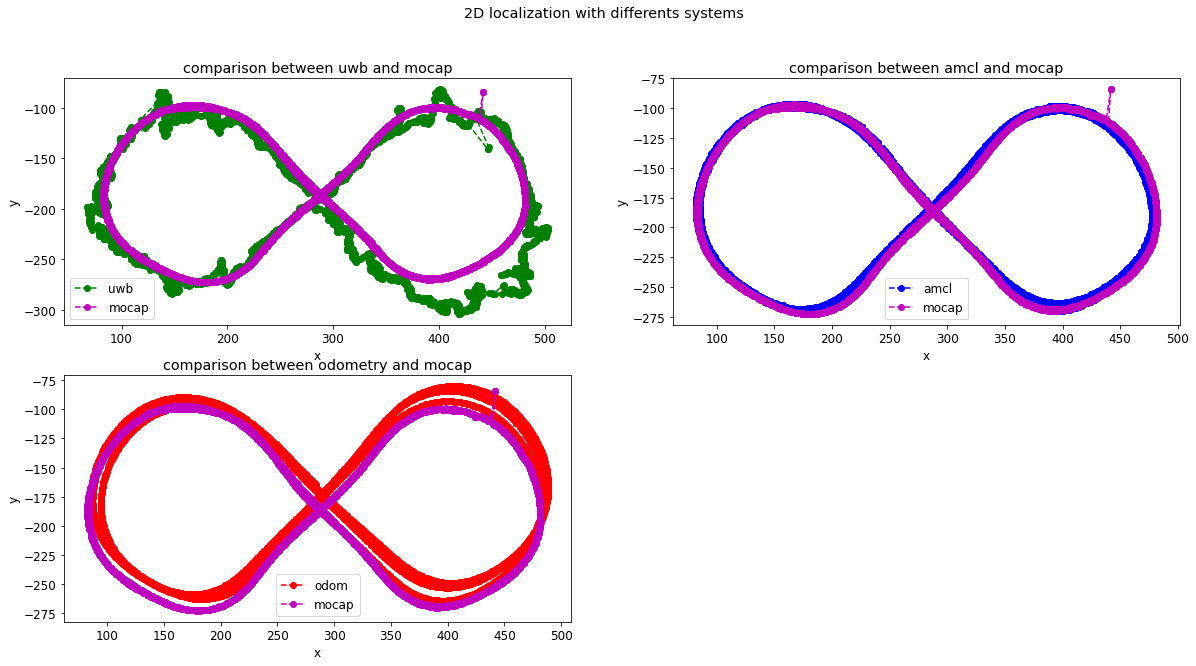

In [49]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot(data['x_uwb_n'], data['y_uwb_n'], color = 'g', linestyle = 'dashed',
         marker = 'o',label = "uwb")

plt.plot(data['x_mocap_n'], data['y_mocap_n'], color = 'm', linestyle = 'dashed',
         marker = 'o',label = "mocap")
plt.title("comparison between uwb and mocap")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(data['x_amcl'], data['y_amcl'], color = 'b', linestyle = 'dashed',
         marker = 'o',label = "amcl")
plt.plot(data['x_mocap_n'], data['y_mocap_n'], color = 'm', linestyle = 'dashed',
         marker = 'o',label = "mocap")
plt.title("comparison between amcl and mocap")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.subplot(2, 2,3)
plt.plot(data['x_odom'], data['y_odom'], color = 'r', linestyle = 'dashed',
         marker = 'o',label = "odom")
plt.plot(data['x_mocap_n'], data['y_mocap_n'], color = 'm', linestyle = 'dashed',
         marker = 'o',label = "mocap")
plt.title("comparison between odometry and mocap")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.suptitle("2D localization with differents systems")
plt.show()

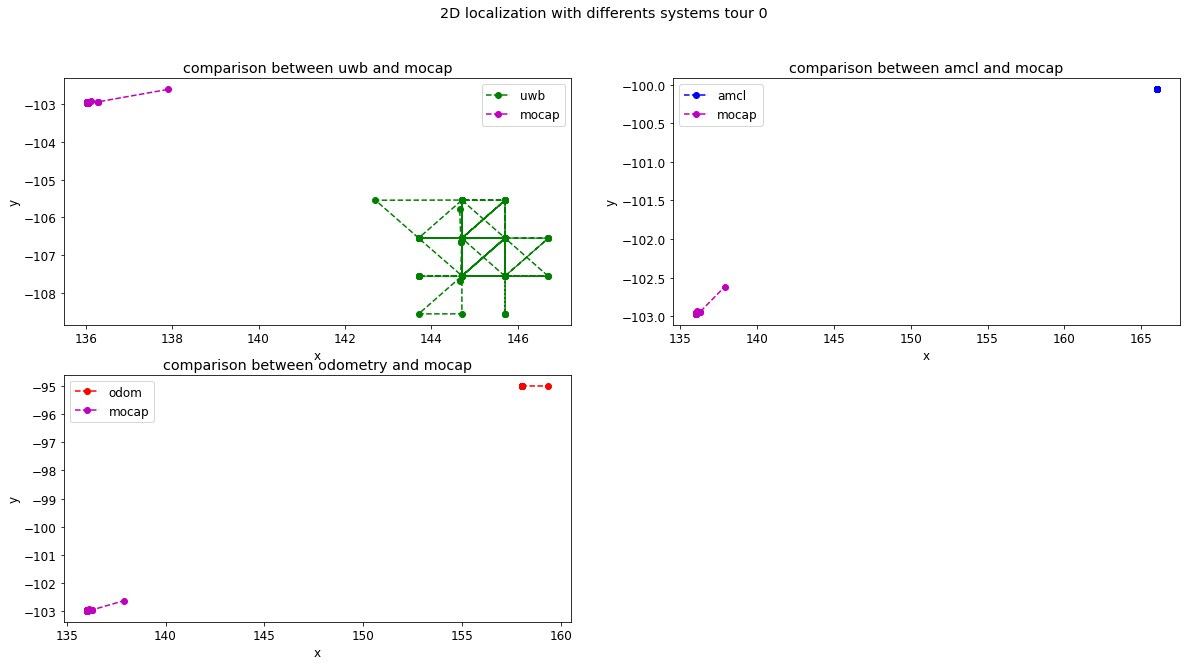

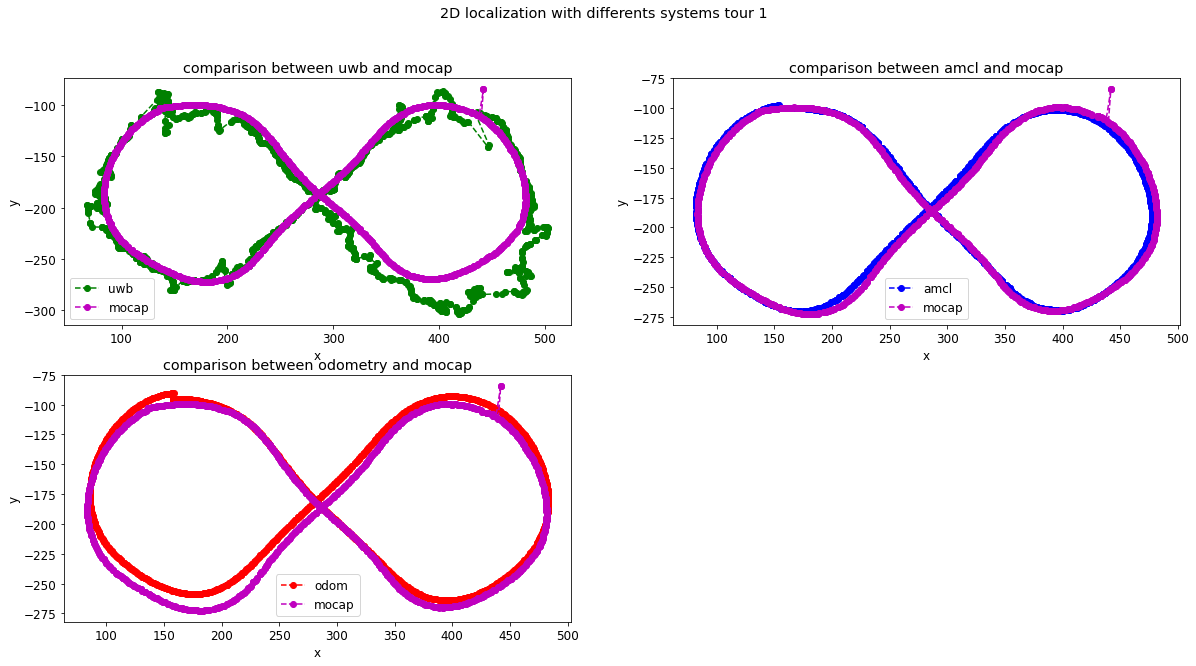

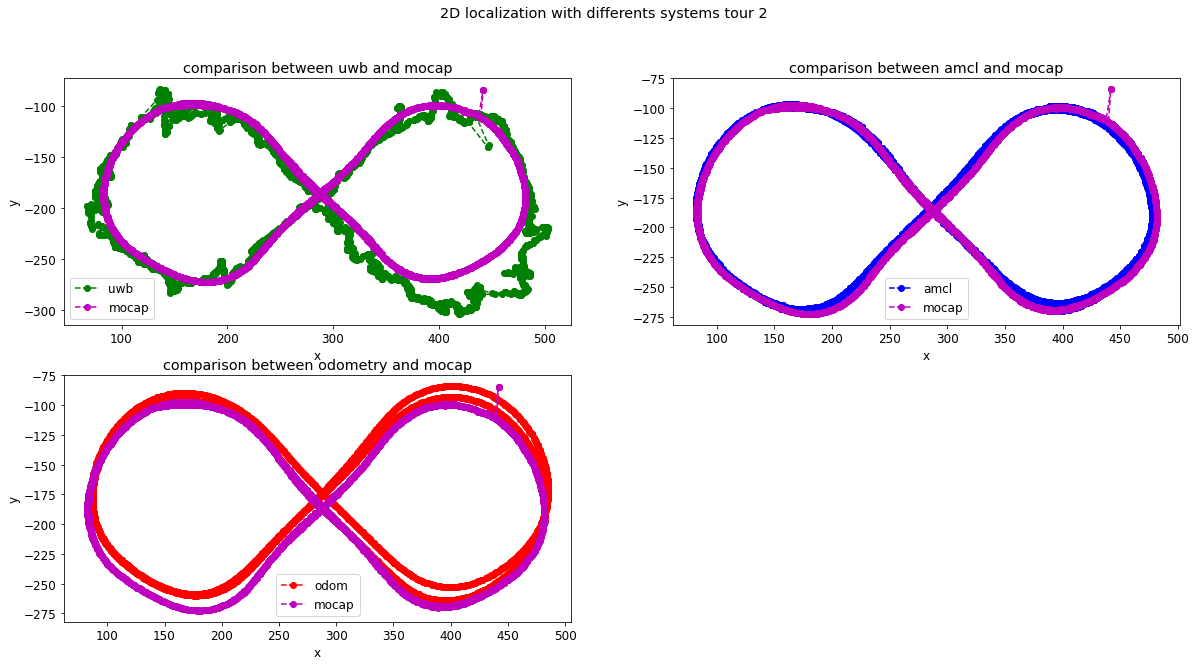

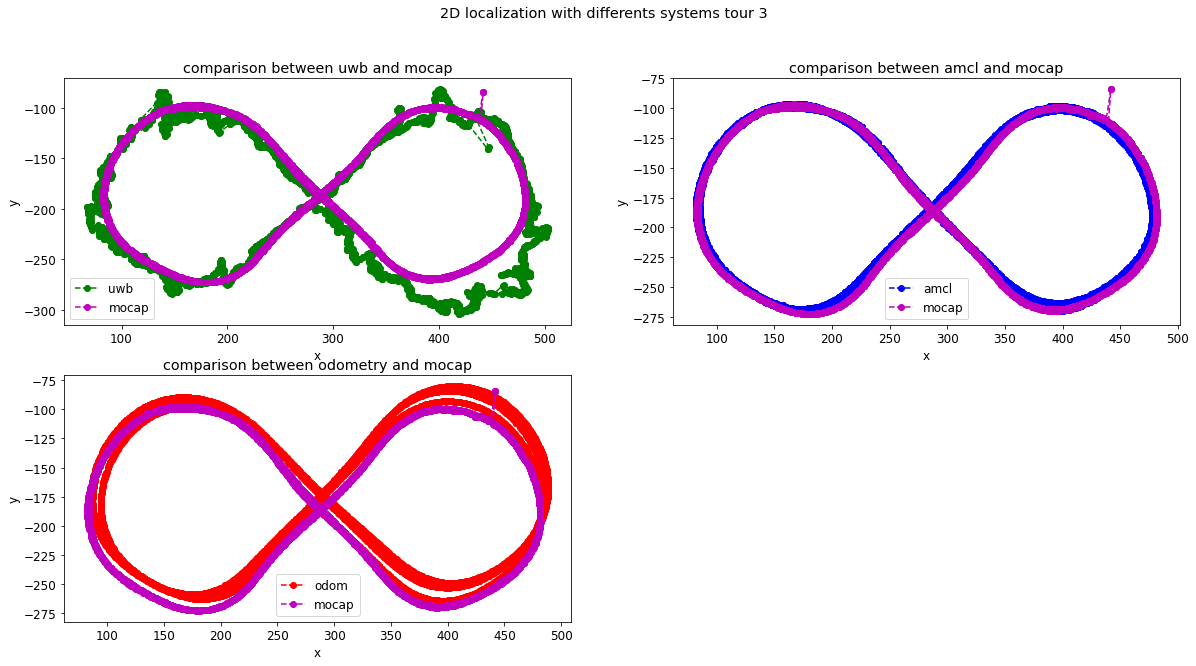

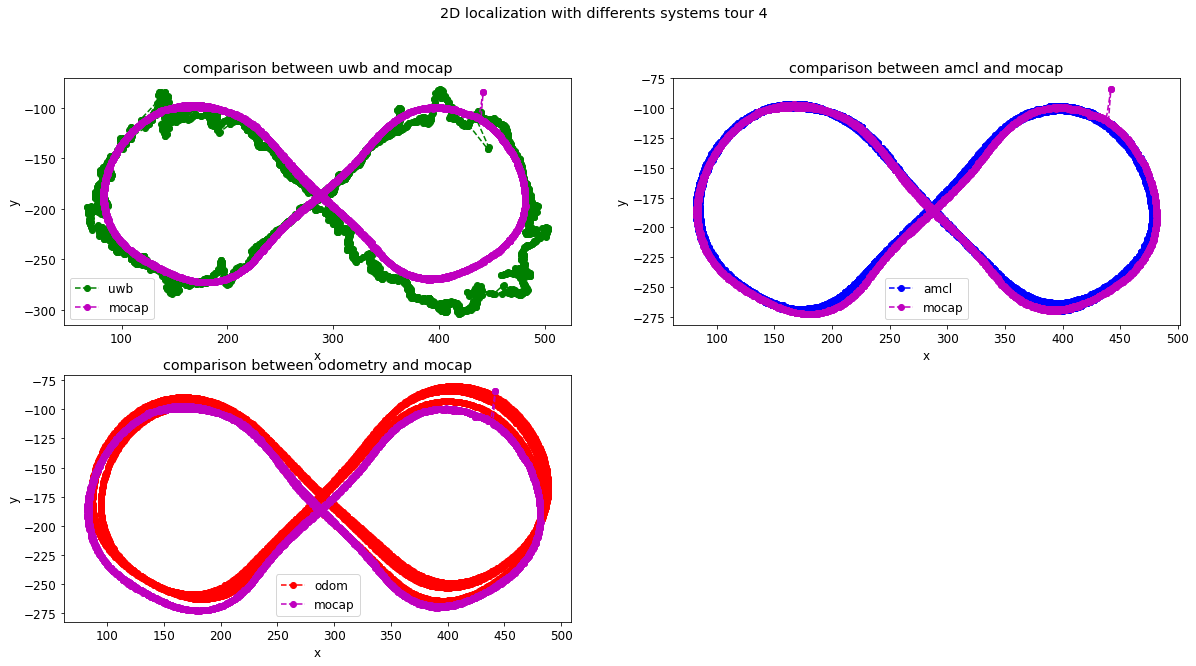

In [50]:
old_trajec = trajec[0]
t = 0
plote = 0
for t in range(0,len(trajec)-1):
    if trajec[t] == trajec[t+1]:
        pass
    else:
        plt.title("comparison between odometry and mocap")
        plt.subplot(2, 2, 1)
        plt.plot(data['x_uwb_n'][plote:t], data['y_uwb_n'][plote:t], color = 'g', linestyle = 'dashed',
                 marker = 'o',label = "uwb")

        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        plt.title("comparison between uwb and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.subplot(2, 2, 2)
        plt.plot(data['x_amcl'][plote:t], data['y_amcl'][plote:t], color = 'b', linestyle = 'dashed',
                 marker = 'o',label = "amcl")
        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        plt.title("comparison between amcl and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.subplot(2, 2,3)
        plt.plot(data['x_odom'][plote:t], data['y_odom'][plote:t], color = 'r', linestyle = 'dashed',
                 marker = 'o',label = "odom")
        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        plt.title("comparison between odometry and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.suptitle("2D localization with differents systems tour "+str(trajec[t]))


        #plt.xticks(rotation = 25)
        #plt.legend()
        
        plt.show()
    old_trajec =  trajec[t]

162


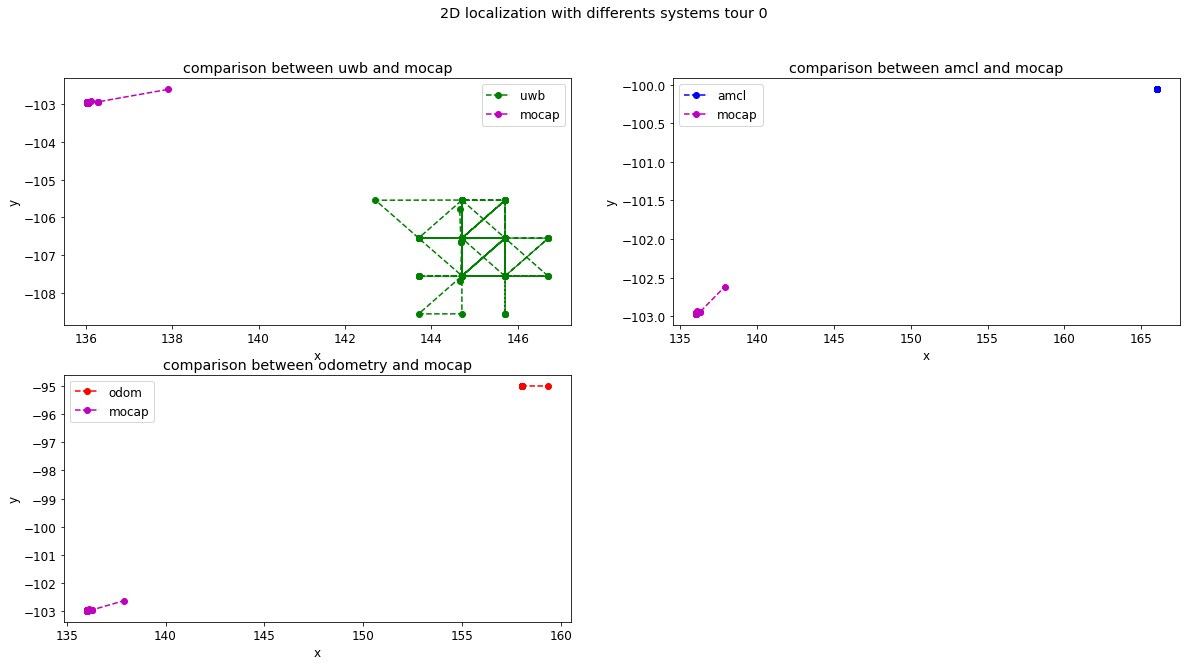

1586


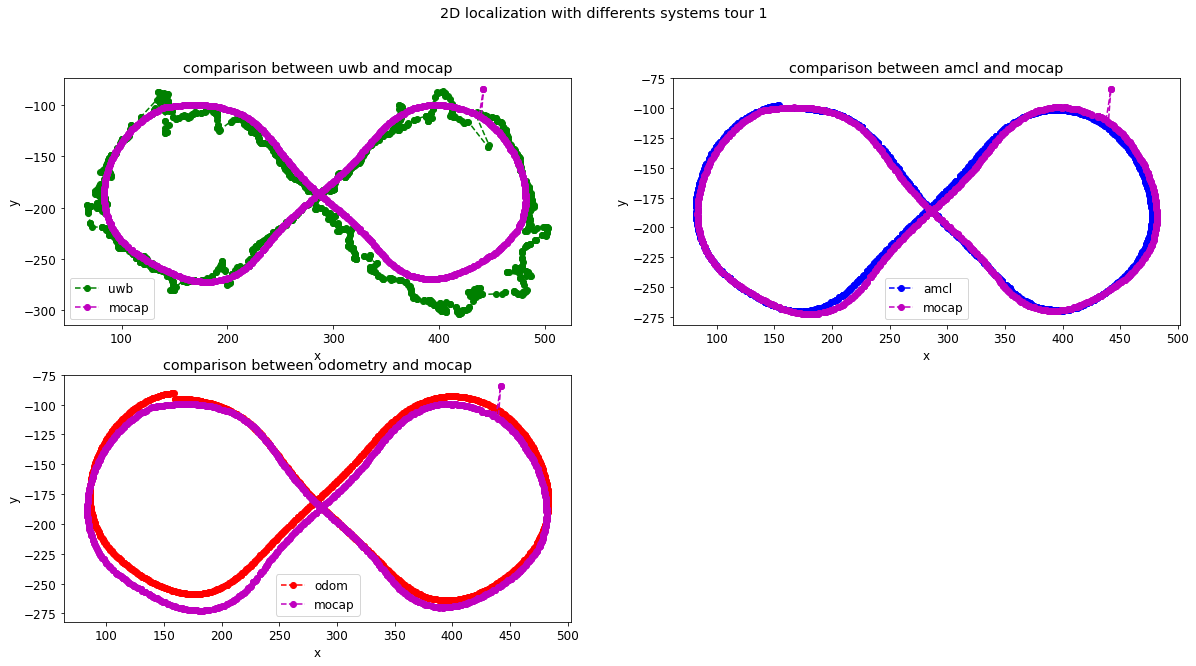

3012


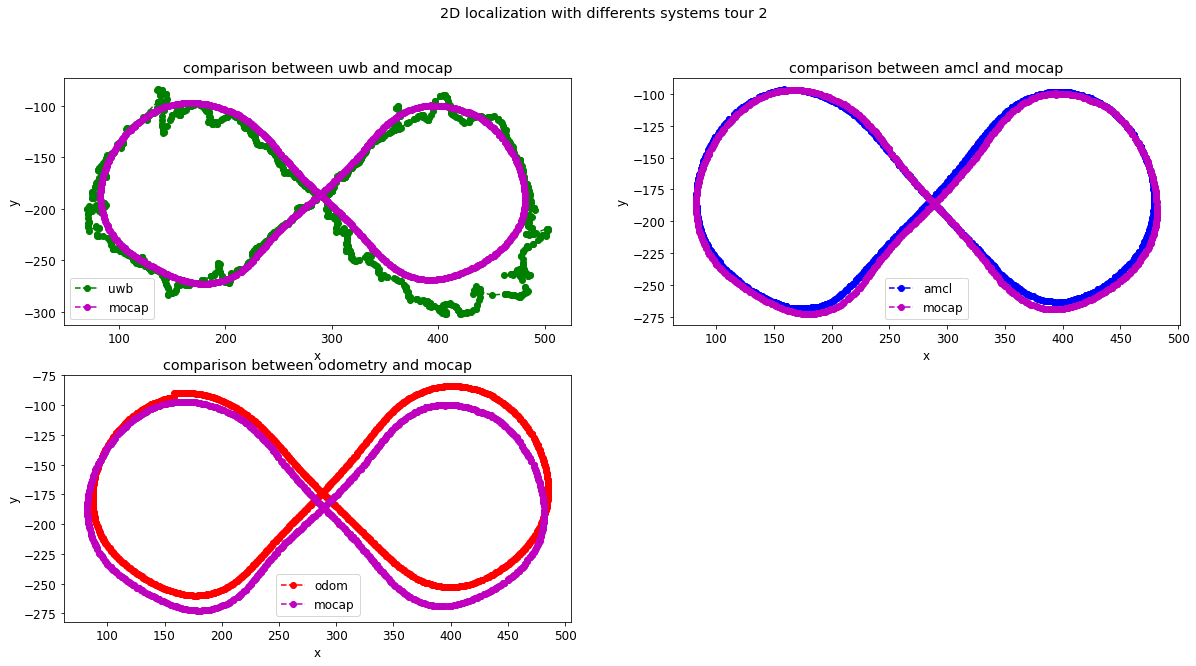

4437


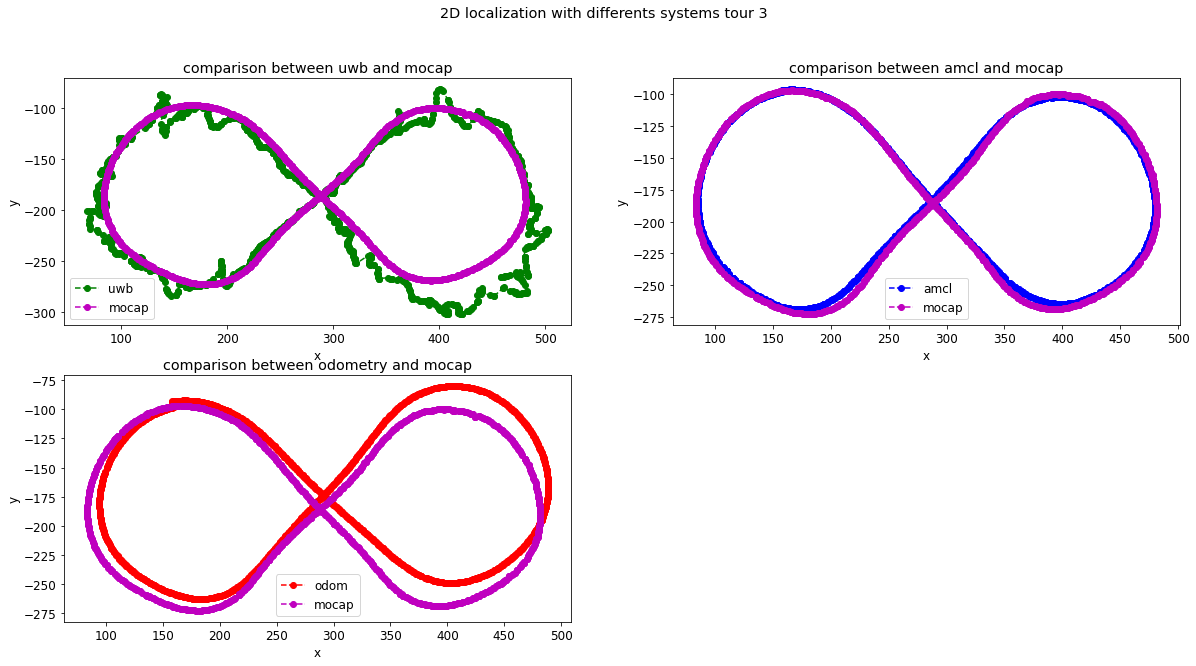

4438


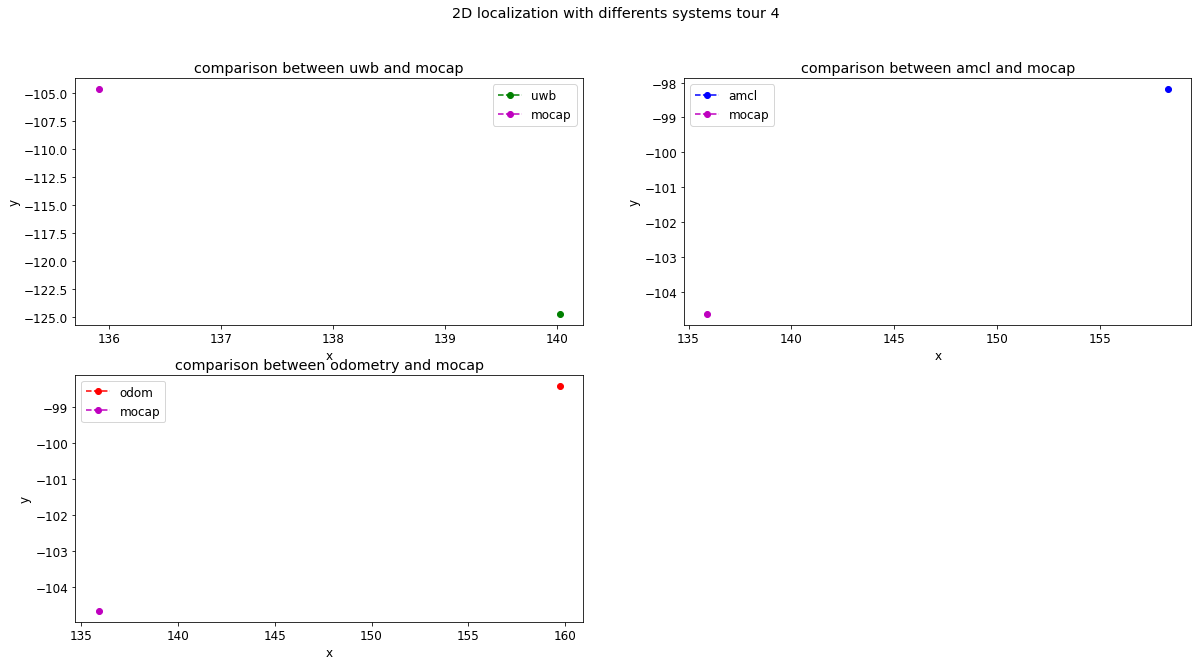

In [51]:
old_trajec = trajec[0]
t = 0
plote = 0
for t in range(0,len(trajec)-1):
    if trajec[t] == trajec[t+1]:
        pass
    else:
        plt.title("comparison between odometry and mocap")
        plt.subplot(2, 2, 1)
        plt.plot(data['x_uwb_n'][plote:t], data['y_uwb_n'][plote:t], color = 'g', linestyle = 'dashed',
                 marker = 'o',label = "uwb")

        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        plt.title("comparison between uwb and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.subplot(2, 2, 2)
        plt.plot(data['x_amcl'][plote:t], data['y_amcl'][plote:t], color = 'b', linestyle = 'dashed',
                 marker = 'o',label = "amcl")
        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        plt.title("comparison between amcl and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.subplot(2, 2,3)
        plt.plot(data['x_odom'][plote:t], data['y_odom'][plote:t], color = 'r', linestyle = 'dashed',
                 marker = 'o',label = "odom")
        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        plt.title("comparison between odometry and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.suptitle("2D localization with differents systems tour "+str(trajec[t]))
        plote = t
        print(plote)
        
        plt.show()
    old_trajec =  trajec[t]

Error uwb max 5.596714200816223  and min 2.5738851179519315
Error amcl max -2.556575294434438  and min -2.908292243660469
Error odom max -7.617766358239692  and min -7.97110197387056
162


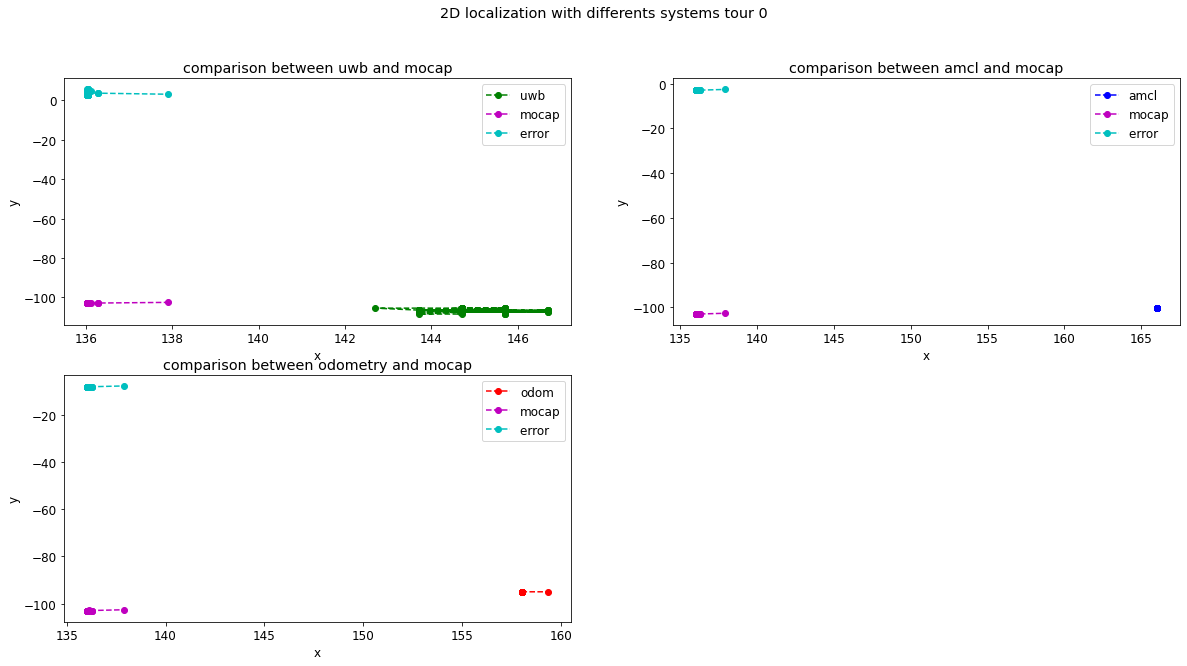

Error uwb max 56.2261269376893  and min -43.010966088171685
Error amcl max 19.057958266358355  and min -27.830631803253226
Error odom max 15.32135890102569  and min -37.51248849328283
1586


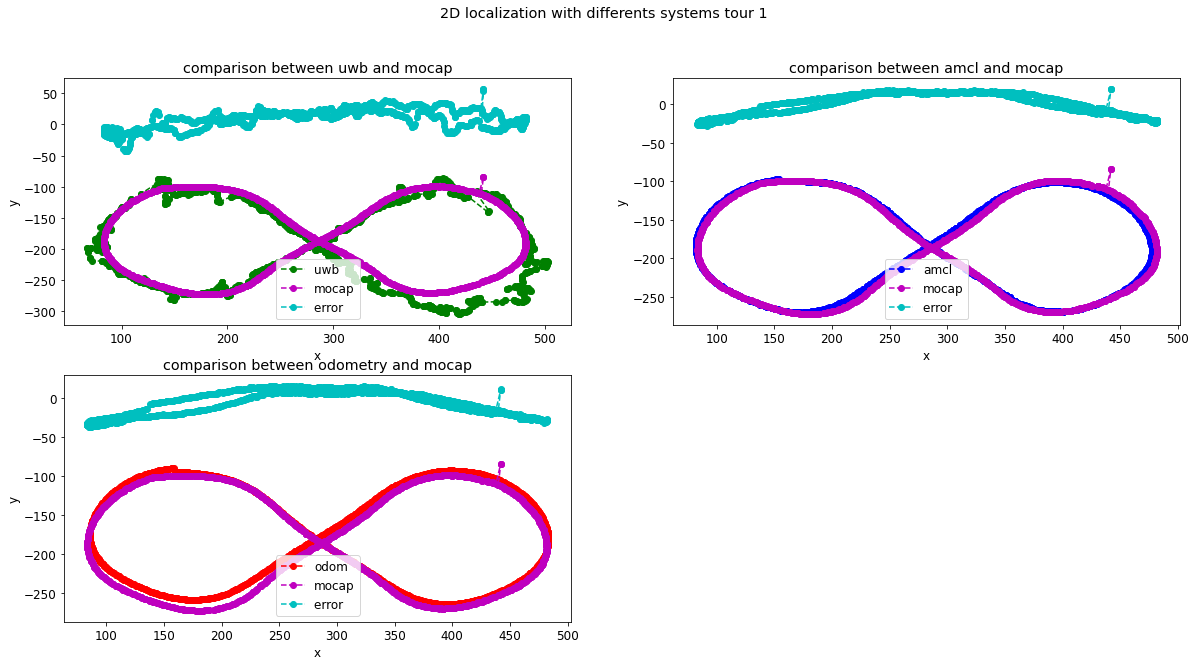

Error uwb max 40.21189342904714  and min -46.201417351580005
Error amcl max 18.504133991454893  and min -28.680329263394867
Error odom max 8.314487386057522  and min -43.73806830437175
3012


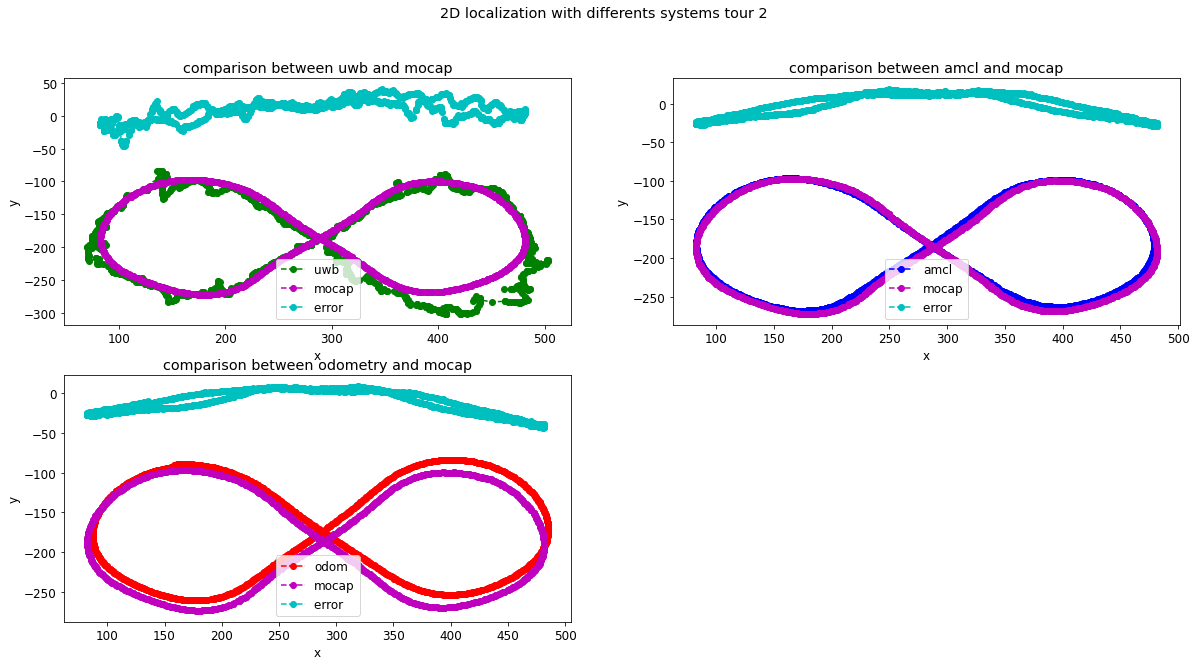

Error uwb max 37.57085581901089  and min -39.31267393461539
Error amcl max 20.03317453365881  and min -29.93598752053498
Error odom max 9.9316403207321  and min -50.31145077876687
4437


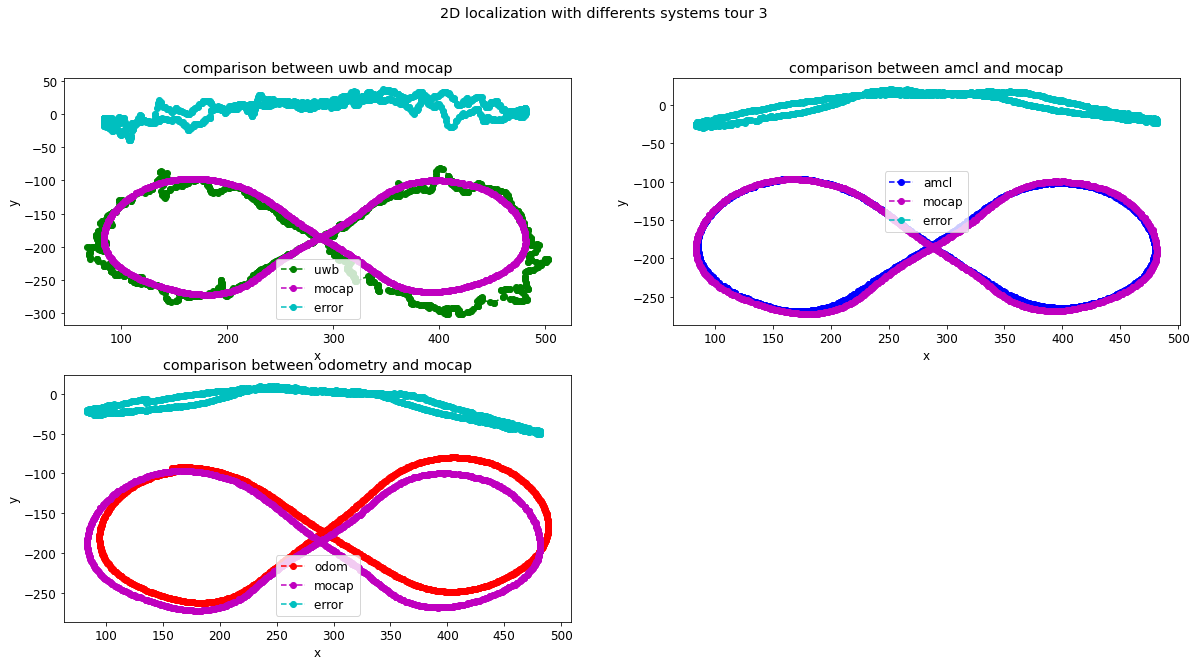

Error uwb max 20.10616004526628  and min 20.10616004526628
Error amcl max -6.4466816376189655  and min -6.4466816376189655
Error odom max -6.212510975554707  and min -6.212510975554707
4438


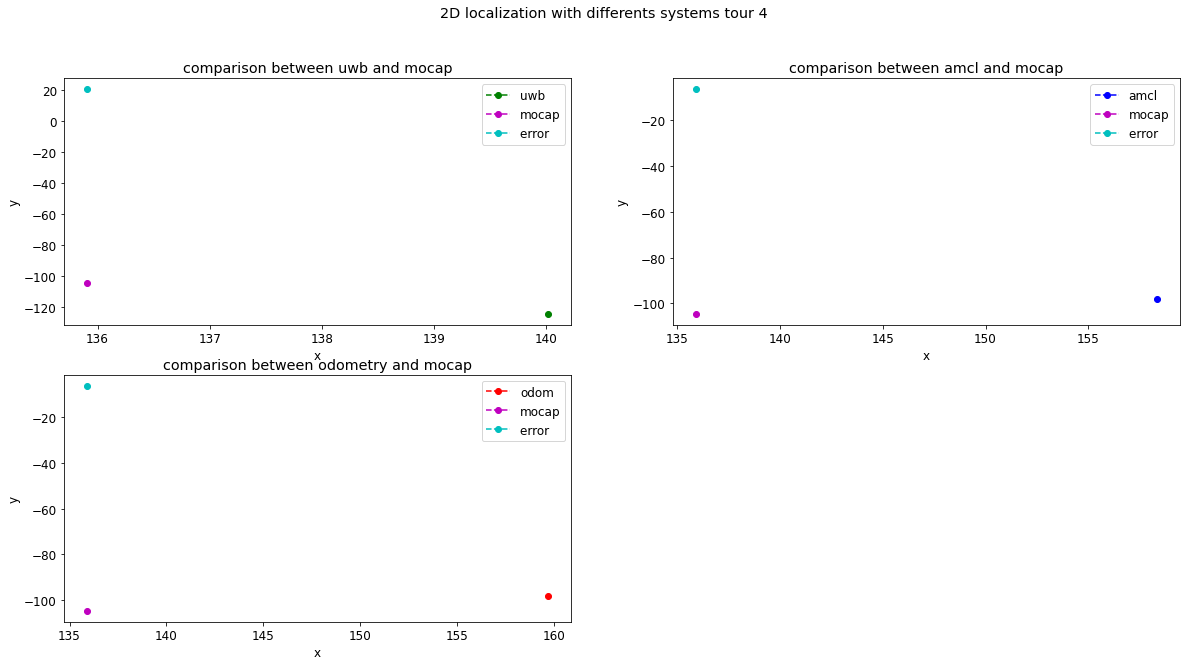

In [52]:
old_trajec = trajec[0]
t = 0
plote = 0
for t in range(0,len(trajec)-1):
    if trajec[t] == trajec[t+1]:
        pass
    else:
        plt.title("comparison between odometry and mocap")
        plt.subplot(2, 2, 1)
        plt.plot(data['x_uwb_n'][plote:t], data['y_uwb_n'][plote:t], color = 'g', linestyle = 'dashed',
                 marker = 'o',label = "uwb")

        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        error = [ ]
        for x in range(0,len(data['x_mocap_n'][plote:t])):
            error.append(data['y_mocap_n'][plote:t][x]-data['y_uwb_n'][plote:t][x])
        plt.plot(data['x_mocap_n'][plote:t], error, color = 'c', linestyle = 'dashed',
                 marker = 'o',label = "error ")
        print("Error uwb max",max(error)," and min",min(error))
        plt.title("comparison between uwb and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.subplot(2, 2, 2)
        plt.plot(data['x_amcl'][plote:t], data['y_amcl'][plote:t], color = 'b', linestyle = 'dashed',
                 marker = 'o',label = "amcl")
        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        error = [ ]
        for x in range(0,len(data['x_mocap_n'][plote:t])):
            error.append(data['y_mocap_n'][plote:t][x]-data['y_amcl'][plote:t][x])
        plt.plot(data['x_mocap_n'][plote:t], error, color = 'c', linestyle = 'dashed',
                 marker = 'o',label = "error ")
        print("Error amcl max",max(error)," and min",min(error))
        plt.title("comparison between amcl and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.subplot(2, 2,3)
        plt.plot(data['x_odom'][plote:t], data['y_odom'][plote:t], color = 'r', linestyle = 'dashed',
                 marker = 'o',label = "odom")
        plt.plot(data['x_mocap_n'][plote:t], data['y_mocap_n'][plote:t], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
        error = [ ]
        for x in range(0,len(data['x_mocap_n'][plote:t])):
            error.append(data['y_mocap_n'][plote:t][x]-data['y_odom'][plote:t][x])
        plt.plot(data['x_mocap_n'][plote:t], error, color = 'c', linestyle = 'dashed',
                 marker = 'o',label = "error ")
        print("Error odom max",max(error)," and min",min(error))
        plt.title("comparison between odometry and mocap")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.suptitle("2D localization with differents systems tour "+str(trajec[t]))
        plote = t
        print(plote)
        
        plt.show()
    old_trajec =  trajec[t]

-93.32654222846031 -96.62320777979082
-93.2511455193162 -96.57212468642687
-93.04144073277712 -96.57212468642687
-93.04144073277712 -96.57212468642687
-92.97996114939451 -96.43698547914647
-92.80288077890873 -96.30210734093559
-92.80288077890873 -96.30210734093559
-92.75444455444813 -96.27849968119828
-92.62041252106428 -96.27849968119828
-92.58534617722034 -96.2150996794924
-92.47978951781988 -96.2150996794924
-92.45906963944435 -96.20995735712759
-92.45906963944435 -96.20995735712759
-92.44478352367878 -96.21840341050749
-92.42404036223888 -96.21840341050749
-92.42404036223888 -96.21840341050749
-92.42097295820713 -96.26798326966609
-92.43275493383408 -96.29539075116277
-92.45276309549809 -96.29539075116277
-92.45276309549809 -96.29539075116277
-92.54359591752291 -96.48311184256472
-92.57433589547873 -96.6779800236066
-92.69997913390398 -96.93736450827168
-92.7456584572792 -96.93736450827168
-92.7456584572792 -96.93736450827168
-92.7456584572792 -96.93736450827168
-92.88938816636801 

-102.9782709479332 -101.95739766984978
-102.36506208777428 -101.31212463354154
-102.15244486927986 -101.31212463354154
-102.15244486927986 -101.31212463354154
-101.40726462006569 -101.14624306989
-101.21041655540466 -100.57353424668955
-101.21041655540466 -100.57353424668955
-100.54386489093304 -100.42481742168825
-100.38647212088108 -100.42481742168825
-100.38647212088108 -100.42481742168825
-100.38647212088108 -100.42481742168825
-99.78672385215759 -99.40754695639762
-99.64918091893196 -99.40754695639762
-99.2735107243061 -98.9740646438294
-99.2735107243061 -98.9740646438294
-99.14941757917404 -98.72072336198944
-98.85561883449554 -98.45144856549226
-98.74694392085075 -98.45144856549226
-98.42862494289875 -98.19445428083449
29.366838147098377 -5.225035990958702


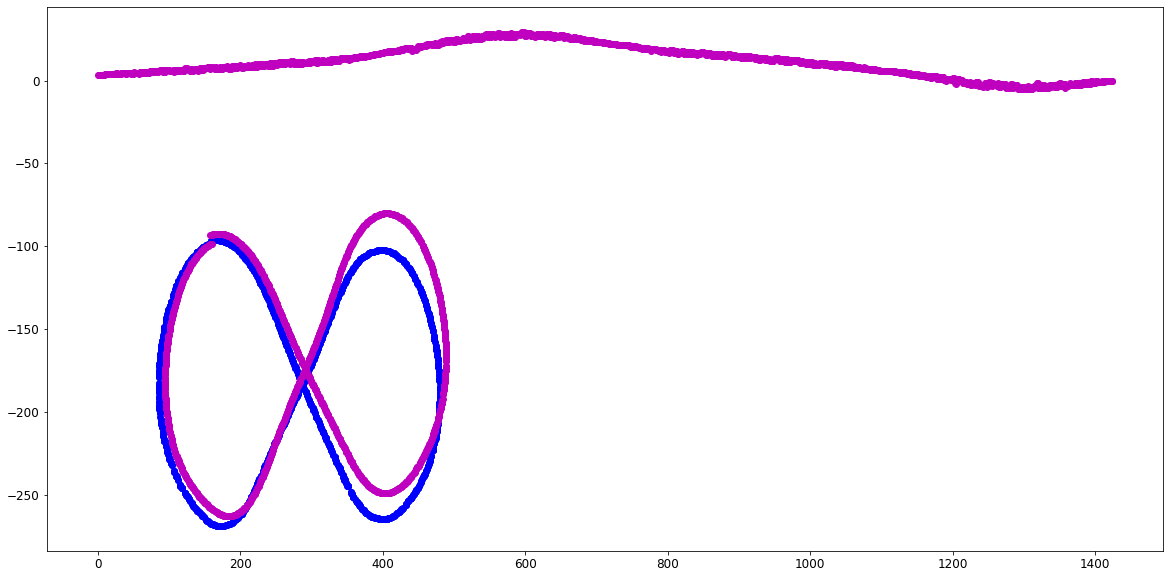

In [53]:
plt.plot(data['x_amcl'][3012:4437], data['y_amcl'][3012:4437], color = 'b', linestyle = 'dashed',
                 marker = 'o',label = "amcl")
plt.plot(data['x_odom'][3012:4437], data['y_odom'][3012:4437], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "odom")
error =[ ]
for x in range(0,4437-3012):
    error.append(data['y_odom'][3012:4437][x]-data['y_amcl'][3012:4437][x])
    print(data['y_odom'][3012:4437][x],data['y_amcl'][3012:4437][x])
plt.plot(range(0,4437-3012), error, color = 'm', linestyle = 'dashed',
            marker = 'o',label = "mocap")

print(max(error),min(error))

-126.41521576020827 -96.62320777979082
-122.91363193547133 -96.57212468642687
-118.91363193547133 -96.57212468642687
-118.91363193547133 -96.57212468642687
-113.72493810116941 -96.43698547914647
-113.02571444261578 -96.30210734093559
-113.02571444261578 -96.30210734093559
-109.68849283419169 -96.27849968119828
-109.68849283419169 -96.27849968119828
-109.03848155890952 -96.2150996794924
-108.03848155890952 -96.2150996794924
-105.57228608174844 -96.20995735712759
-105.57228608174844 -96.20995735712759
-102.96526187612346 -96.21840341050749
-102.96526187612346 -96.21840341050749
-102.96526187612346 -96.21840341050749
-106.3738787480221 -96.26798326966609
-108.7529492692135 -96.29539075116277
-108.7529492692135 -96.29539075116277
-108.7529492692135 -96.29539075116277
-105.1217371708432 -96.48311184256472
-104.42097571424213 -96.6779800236066
-103.42097571424213 -96.93736450827168
-103.05730557101309 -96.93736450827168
-103.05730557101309 -96.93736450827168
-103.05730557101309 -96.937364508

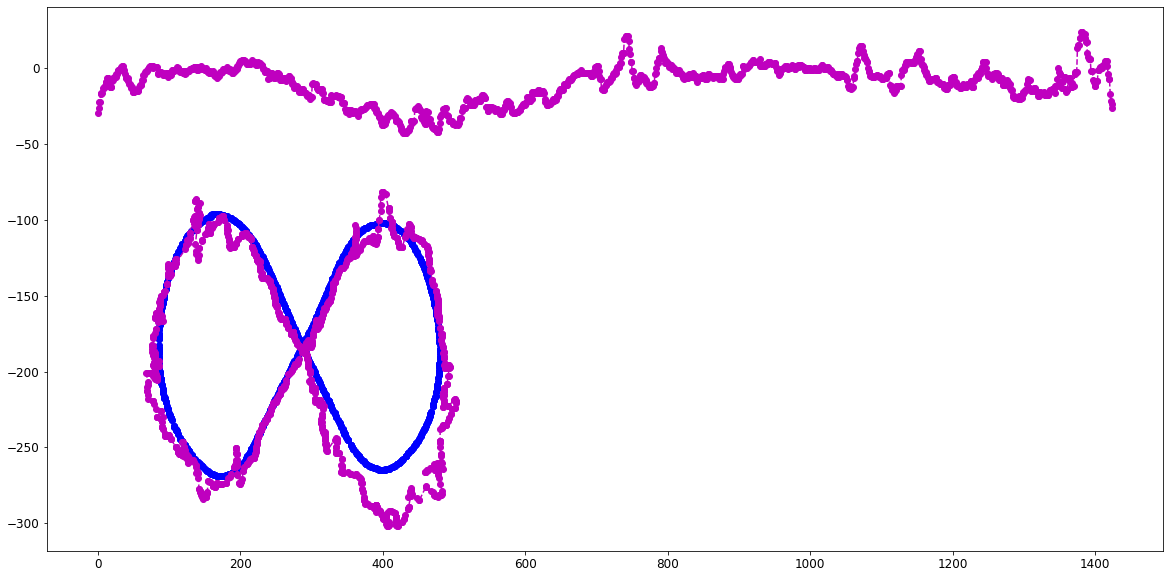

In [54]:
plt.plot(data['x_amcl'][3012:4437], data['y_amcl'][3012:4437], color = 'b', linestyle = 'dashed',
                 marker = 'o',label = "amcl")
plt.plot(data['x_uwb_n'][3012:4437], data['y_uwb_n'][3012:4437], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
error =[ ]
for x in range(0,4437-3012):
    error.append(data['y_uwb_n'][3012:4437][x]-data['y_amcl'][3012:4437][x])
    print(data['y_uwb_n'][3012:4437][x],data['y_amcl'][3012:4437][x])
plt.plot(range(0,4437-3012), error, color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")

print(max(error),min(error))

8.784890467531994 -9.582448607829832


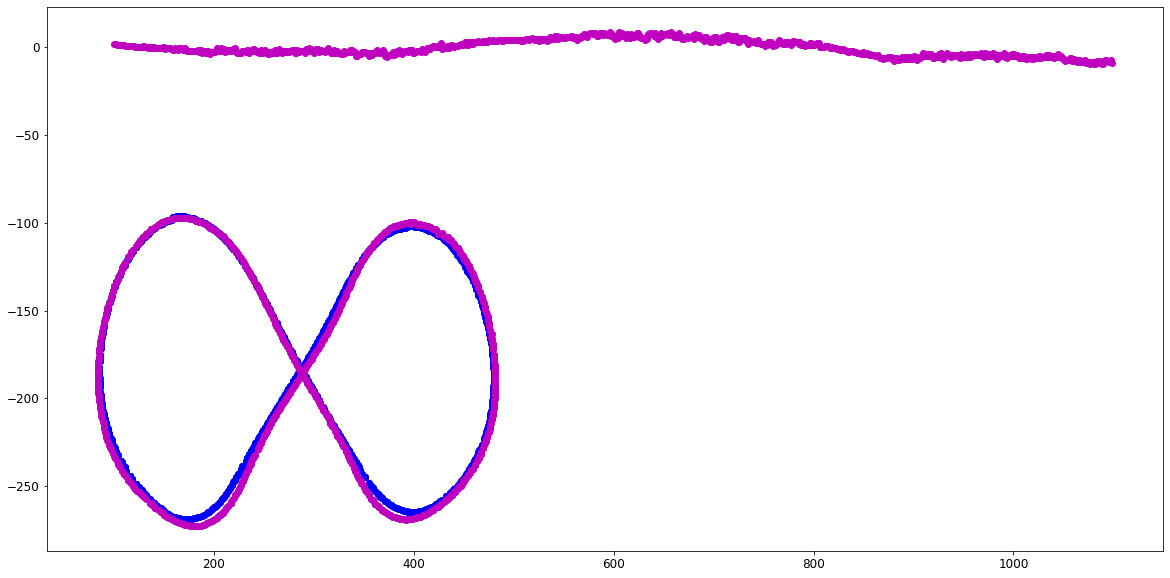

In [76]:
plt.plot(data['x_amcl'][3012:4437], data['y_amcl'][3012:4437], color = 'b', linestyle = 'dashed',
                 marker = 'o',label = "amcl")
plt.plot(data['x_mocap_n'][3012:4437], data['y_mocap_n'][3012:4437], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
error =[ ]
for x in range(0,1000):
    error.append(abs(data['y_mocap_n'][3032:4457][x])-abs(data['y_amcl'][3012:4437][x]))
    #print(data['y_mocap_n'][3012:4437][x],data['y_amcl'][3012:4437][x])
plt.plot(range(100,1100), error, color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")

print(max(error),min(error))

24.035849004764287 -20.03317453365881


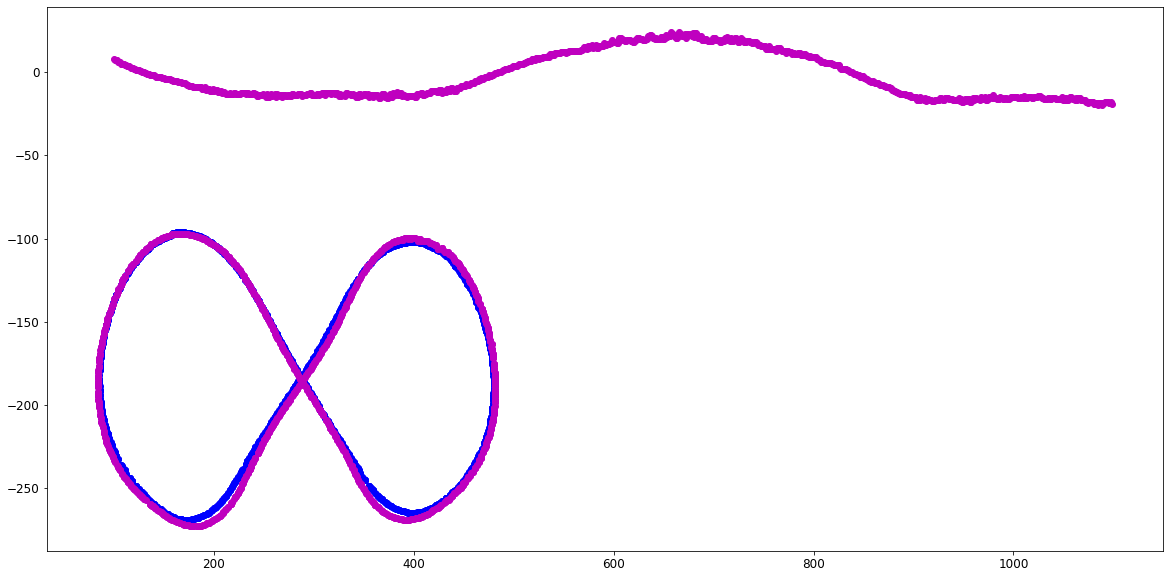

In [81]:
plt.plot(data['x_amcl'][3012:4437], data['y_amcl'][3012:4437], color = 'b', linestyle = 'dashed',
                 marker = 'o',label = "amcl")
plt.plot(data['x_mocap_n'][3012:4437], data['y_mocap_n'][3012:4437], color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")
error =[ ]
for x in range(0,1000):
    error.append(abs(data['y_mocap_n'][3012:4437][x])-abs(data['y_amcl'][3012:4437][x]))
    #print(data['y_mocap_n'][3012:4437][x],data['y_amcl'][3012:4437][x])
plt.plot(range(100,1100), error, color = 'm', linestyle = 'dashed',
                 marker = 'o',label = "mocap")

print(max(error),min(error))